<a href="https://colab.research.google.com/github/Brunorreis123/data_science/blob/main/sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Modelagem de dados
import pandas as pd
import numpy as np

# Graficos
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Avisos
import warnings
warnings.filterwarnings('ignore')

# configurações
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 100)

plt.rcParams['figure.figsize'] = ( 12, 6 )
plt.style.use('seaborn-darkgrid')

# Libs
import re # REGEX
import nltk # NLP

In [2]:
# Lendo a base de dados
Base_Dados = pd.read_csv('Tweets_Mg.csv')

# Dimensão
Base_Dados.shape

(8199, 26)

In [3]:
# Veriicar
Base_Dados.head()

,Unnamed: 0,Created At,Text,Geo Coordinates.latitude,Geo Coordinates.longitude,User Location,Username,User Screen Name,Retweet Count,Classificacao,Observação,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24
0,0,Sun Jan 08 01:22:05 +0000 2017,���⛪ @ Catedral de Santo Antônio - Governador ...,NaN,NaN,Brasil,Leonardo C Schneider,LeoCSchneider,0,Neutro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Sun Jan 08 01:49:01 +0000 2017,"� @ Governador Valadares, Minas Gerais https:/...",-41.9333,-18.85,NaN,Wândell,klefnews,0,Neutro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Sun Jan 08 01:01:46 +0000 2017,"�� @ Governador Valadares, Minas Gerais https:...",-41.9333,-18.85,NaN,Wândell,klefnews,0,Neutro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Wed Jan 04 21:43:51 +0000 2017,��� https://t.co/BnDsO34qK0,NaN,NaN,NaN,Ana estudando,estudandoconcur,0,Neutro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Mon Jan 09 15:08:21 +0000 2017,��� PSOL vai questionar aumento de vereadores ...,NaN,NaN,NaN,Emily,Milly777,0,Negativo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Modeling & EDA (Exploration)

## Campos **nulos**

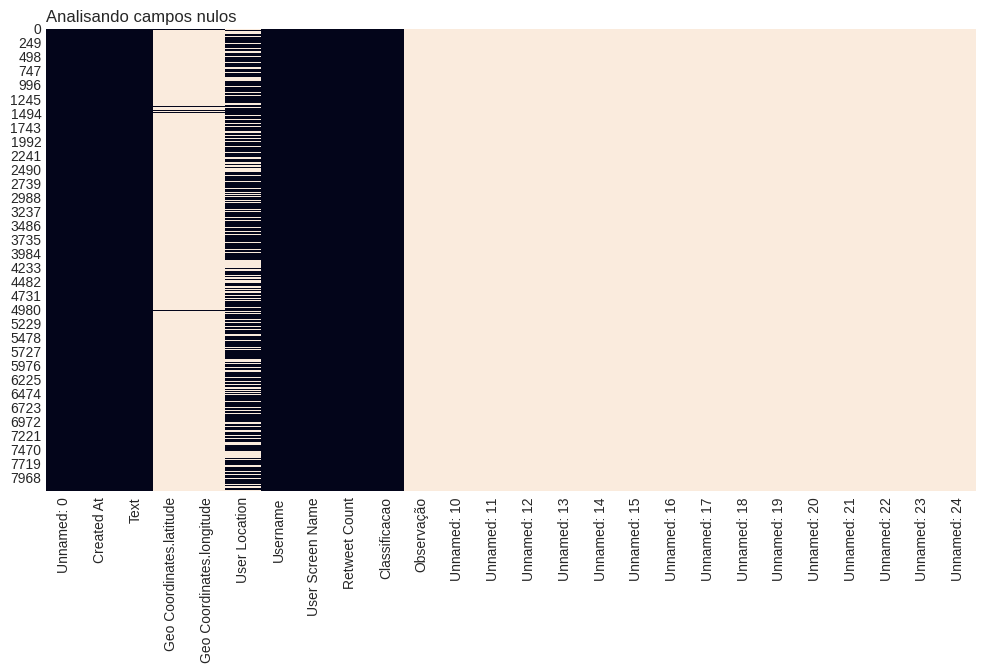

In [4]:
# campos nulos
Nulos = Base_Dados.isnull()

plt.title('Analisando campos nulos', loc='left')
sns.heatmap( Nulos, cbar=False );

In [5]:
# Colunas
Base_Dados.columns

Index(['Unnamed: 0', 'Created At', 'Text', 'Geo Coordinates.latitude',
       'Geo Coordinates.longitude', 'User Location', 'Username',
       'User Screen Name', 'Retweet Count', 'Classificacao', 'Observação',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17',
       'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21',
       'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24'],
      dtype='object')

In [6]:
# Remover as colunas
Colunas_Extrair = Base_Dados.columns[10:]
Base_Dados.drop( columns=Colunas_Extrair, inplace=True )

In [7]:
# Dimensão
Base_Dados.shape

(8199, 10)

In [8]:
# Unicos
Base_Dados.nunique()

Unnamed: 0                   8199
Created At                   7945
Text                         5765
Geo Coordinates.latitude       57
Geo Coordinates.longitude      57
User Location                1591
Username                     3907
User Screen Name             3966
Retweet Count                 113
Classificacao                   3
dtype: int64

In [9]:
# Retirar
Base_Dados.drop( columns='Unnamed: 0', inplace=True )

# Dimensão
Base_Dados.shape

(8199, 9)

In [10]:
# Verificando
Base_Dados.head()

,Created At,Text,Geo Coordinates.latitude,Geo Coordinates.longitude,User Location,Username,User Screen Name,Retweet Count,Classificacao
0,Sun Jan 08 01:22:05 +0000 2017,���⛪ @ Catedral de Santo Antônio - Governador ...,NaN,NaN,Brasil,Leonardo C Schneider,LeoCSchneider,0,Neutro
1,Sun Jan 08 01:49:01 +0000 2017,"� @ Governador Valadares, Minas Gerais https:/...",-41.9333,-18.85,NaN,Wândell,klefnews,0,Neutro
2,Sun Jan 08 01:01:46 +0000 2017,"�� @ Governador Valadares, Minas Gerais https:...",-41.9333,-18.85,NaN,Wândell,klefnews,0,Neutro
3,Wed Jan 04 21:43:51 +0000 2017,��� https://t.co/BnDsO34qK0,NaN,NaN,NaN,Ana estudando,estudandoconcur,0,Neutro
4,Mon Jan 09 15:08:21 +0000 2017,��� PSOL vai questionar aumento de vereadores ...,NaN,NaN,NaN,Emily,Milly777,0,Negativo


In [11]:
# Info
Base_Dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8199 entries, 0 to 8198
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Created At                 8199 non-null   object 
 1   Text                       8199 non-null   object 
 2   Geo Coordinates.latitude   104 non-null    float64
 3   Geo Coordinates.longitude  104 non-null    float64
 4   User Location              5489 non-null   object 
 5   Username                   8199 non-null   object 
 6   User Screen Name           8199 non-null   object 
 7   Retweet Count              8199 non-null   int64  
 8   Classificacao              8199 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 576.6+ KB


## **Ajustando Data**

In [12]:
# Função
from dateutil.parser import parse

Experimento_Data = Base_Dados['Created At'][0]

print( f'Antes: {Experimento_Data}' )
print( f'Depois: { parse( Experimento_Data ).date() }' )

Antes: Sun Jan 08 01:22:05 +0000 2017
Depois: 2017-01-08


In [13]:
# Função para extrair

def Ajustar_Data( Data ):
  '''
    Função para converter Data
  '''
  # Atribuir
  Texto_Data = Data
  # Transform
  Transformacao = parse( Texto_Data )
  # Extracação
  Data_Formatada = Transformacao.date()
  return Data_Formatada

# Atribuindo função
Base_Dados['Data_Formatada'] = Base_Dados['Created At'].apply( Ajustar_Data )

# Filtro
Base_Dados.iloc[0:5, 5:]

,Username,User Screen Name,Retweet Count,Classificacao,Data_Formatada
0,Leonardo C Schneider,LeoCSchneider,0,Neutro,2017-01-08
1,Wândell,klefnews,0,Neutro,2017-01-08
2,Wândell,klefnews,0,Neutro,2017-01-08
3,Ana estudando,estudandoconcur,0,Neutro,2017-01-04
4,Emily,Milly777,0,Negativo,2017-01-09


In [14]:
# Exemplo de outra forma
Base_Dados['Created At'].apply( lambda Texto : parse(Texto).date() )


0       2017-01-08
1       2017-01-08
2       2017-01-08
3       2017-01-04
4       2017-01-09
           ...    
8194    2017-02-09
8195    2017-02-09
8196    2017-02-09
8197    2017-02-09
8198    2017-02-07
Name: Created At, Length: 8199, dtype: object

In [15]:
# Gerando Meses,Ano,Dias

# transforma data
Base_Dados['Data_Formatada'] = pd.to_datetime( Base_Dados['Data_Formatada'] )

# Extraindo
Base_Dados['Ano'] = Base_Dados['Data_Formatada'].dt.year
Base_Dados['Mes'] = Base_Dados['Data_Formatada'].dt.month
Base_Dados['Dia'] = Base_Dados['Data_Formatada'].dt.day

Base_Dados.iloc[0:5, 5:]


,Username,User Screen Name,Retweet Count,Classificacao,Data_Formatada,Ano,Mes,Dia
0,Leonardo C Schneider,LeoCSchneider,0,Neutro,2017-01-08,2017,1,8
1,Wândell,klefnews,0,Neutro,2017-01-08,2017,1,8
2,Wândell,klefnews,0,Neutro,2017-01-08,2017,1,8
3,Ana estudando,estudandoconcur,0,Neutro,2017-01-04,2017,1,4
4,Emily,Milly777,0,Negativo,2017-01-09,2017,1,9


In [16]:
# Analisando
Base_Dados.groupby( by=['Ano', 'Mes'] ).agg(
    Quantidade = ('Username', 'count')
)

Quantidade
Ano  Mes            
2016 12            3
2017 1          7073
     2          1123

## **Ajustando Geo_Localização**

In [17]:
Base_Dados.isnull().sum()

Created At                      0
Text                            0
Geo Coordinates.latitude     8095
Geo Coordinates.longitude    8095
User Location                2710
Username                        0
User Screen Name                0
Retweet Count                   0
Classificacao                   0
Data_Formatada                  0
Ano                             0
Mes                             0
Dia                             0
dtype: int64

In [18]:
# Filtrando os nulos
Analise_Geo = Base_Dados.loc[
    ( Base_Dados['Geo Coordinates.latitude'].notnull() ) & 
    ( Base_Dados['Geo Coordinates.longitude'].notnull() )
]

# Shape
Analise_Geo.shape

(104, 13)

In [19]:
# Verificar
Analise_Geo.head()

,Created At,Text,Geo Coordinates.latitude,Geo Coordinates.longitude,User Location,Username,User Screen Name,Retweet Count,Classificacao,Data_Formatada,Ano,Mes,Dia
1,Sun Jan 08 01:49:01 +0000 2017,"� @ Governador Valadares, Minas Gerais https:/...",-41.933300,-18.850000,NaN,Wândell,klefnews,0,Neutro,2017-01-08,2017,1,8
2,Sun Jan 08 01:01:46 +0000 2017,"�� @ Governador Valadares, Minas Gerais https:...",-41.933300,-18.850000,NaN,Wândell,klefnews,0,Neutro,2017-01-08,2017,1,8
105,Fri Jan 06 13:31:11 +0000 2017,#road #trip #mg #car #gopro @ Governador Valad...,-41.933300,-18.850000,Brasil,Heliel Braga,helielbraga,0,Neutro,2017-01-06,2017,1,6
302,Fri Jan 06 00:10:47 +0000 2017,"��❤️ @ Governador Valadares, Minas Gerais http...",-41.933300,-18.850000,Snap: duraoluiza,Luiza�,LuizaFarias9,0,Neutro,2017-01-06,2017,1,6
607,Tue Jan 10 10:47:26 +0000 2017,"bom dia! (@ LFG in Governador Valadares, Minas...",-41.940796,-18.860655,"Minas, Brasil",snap: brunolasco ♎,brunolasco,0,Neutro,2017-01-10,2017,1,10


In [20]:
# Agrupar as Geo
Analise_Localizacao = Analise_Geo.groupby( by=['Geo Coordinates.latitude', 'Geo Coordinates.longitude'] ).count()[['Username']].reset_index()

# Renomeando colunas
Analise_Localizacao.columns = ['Lat', 'Lon', 'Quantidade']

# Verificando
Analise_Localizacao.head()

,Lat,Lon,Quantidade
0,-46.643035,-22.270759,2
1,-46.627106,-23.493237,2
2,-46.616726,-21.131515,1
3,-45.523750,-22.330291,1
4,-45.236850,-19.331757,1


In [21]:
# Plot dos dados
px.density_mapbox(
    # Dados
    Analise_Localizacao,
    # LAtitude
    lat='Lat',
    # Longitude
    lon='Lon',
    # Quantidade
    z='Quantidade',
    # Estilo do mapa
    mapbox_style='stamen-terrain',
    # Centralização
    center=dict(lat=-23.700, lon=-46.555),
    # Zoom do mapa
    zoom=3,
    # Ciruclo
    radius=30
)

In [22]:
# Verificando
Base_Dados['User Location'].head(20)

0                             Brasil
1                                NaN
2                                NaN
3                                NaN
4                                NaN
5         Um Outro Mundo É Possível 
6                                NaN
7             Belo Horizonte, Brasil
8                                NaN
9                Belo Horizonte - MG
10      error 404 location not found
11              Minas Gerais, Brasil
12    Santo Antônio do Monte, Brasil
13                            BRASIL
14                               NaN
15            San Pedro Garza García
16                               NaN
17            Belo Horizonte, Brasil
18          Belo Horizonte MG Brasil
19          Belo Horizonte/MG/Brasil
Name: User Location, dtype: object

In [23]:
# Instalando o GEO PY
!pip install geopy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [24]:
# Função
from geopy.geocoders import Nominatim

# Instanciando a função
Instanciando_Funcao = Nominatim(user_agent='GetLoc', timeout=10) #aumentando o tempo limite de leitura para 10 segundos

In [25]:
print(f'Local: { Instanciando_Funcao.geocode("Brasil").address } ')
print(f'Latitude: { Instanciando_Funcao.geocode("Brasil").latitude }')
print(f'Longitude: { Instanciando_Funcao.geocode("Brasil").longitude }')


Local: Brasil 
Latitude: -10.3333333
Longitude: -53.2


In [26]:
# Analise de representatividade
Analise_Local = Base_Dados['User Location'].value_counts( normalize=True ).cumsum().reset_index()

# Filtrando apenas até 50% 
Analise_Local = Analise_Local.loc[ Analise_Local['User Location'] < 0.5 ]

# Renomear colunas
Analise_Local.columns = ['Local', '%']

# Verificando
Analise_Local.head()

,Local,%
0,Brasil,0.107670
1,Minas Gerais,0.172163
2,Belo Horizonte - Minas Gerais,0.214793
3,"Belo Horizonte, Brasil",0.256149
4,Belo Horizonte,0.280015


In [27]:
# Dimensão
Analise_Local.shape


(39, 2)

In [28]:
# Calcular quantidade
Quantidade = Base_Dados['User Location'].value_counts().reset_index()

Quantidade.columns = ['Local', 'Quantidade']

Quantidade.head()

,Local,Quantidade
0,Brasil,591
1,Minas Gerais,354
2,Belo Horizonte - Minas Gerais,234
3,"Belo Horizonte, Brasil",227
4,Belo Horizonte,131


In [29]:
# Cruzar
Tab_Localizacao = pd.merge( Analise_Local, Quantidade, on=['Local'], how='inner' )

# VErificar
Tab_Localizacao.head()

,Local,%,Quantidade
0,Brasil,0.107670,591
1,Minas Gerais,0.172163,354
2,Belo Horizonte - Minas Gerais,0.214793,234
3,"Belo Horizonte, Brasil",0.256149,227
4,Belo Horizonte,0.280015,131


In [30]:
# Valore unicos
Tab_Localizacao['Local'].unique()


array(['Brasil', 'Minas Gerais', 'Belo Horizonte - Minas Gerais',
       'Belo Horizonte, Brasil', 'Belo Horizonte', 'Brazil',
       'São Paulo, Brasil', 'Rio de Janeiro, Brasil',
       'Belo Horizonte MG Brasil', 'São Paulo', 'Minas Gerais, Brasil',
       'Guarulhos - SP', 'Rio de Janeiro', 'São Joquim de Bicas',
       'Brasília, Brasil', 'Brasil Natal/RN', '-16.683649,-49.268102',
       'Babilonia', 'Rio de Janeiro, Brazil',
       'Fortaleza - Ceará - Brazil', 'WorldWide', 'Manaus-Amazonas',
       'BRASIL', 'Belo Horizonte, Minas Gerais', 'Rio de Janeiro, RJ',
       'Belo Horizonte - MG', 'Ouro Preto - MG Brasil',
       'Governador Valadares', 'Belo Horizonte/MG', 'Hollywood, CA',
       'Minas Gerais - Brasil', 'Sorocaba, Brasil',
       'Governador Valadares, Brasil', 'No coração das Minas Gerais ',
       'brasil', 'Vitória - ES, Brasil', 'Pará de Minas / MG',
       'República de Curitiba', 'Belo Horizonte, MG'], dtype=object)

In [31]:
# Incluindo a Geo Localização com GEOPY

Tab_Localizacao['Latitude'] = None
Tab_Localizacao['Longitude'] = None

# Loop
for Loop in range( 0, len(Tab_Localizacao['Local']) ):

  try:
    Local = Instanciando_Funcao.geocode( Tab_Localizacao['Local'][Loop]  )

  except:
    pass

  if Local!= None:
    Tab_Localizacao['Latitude'][Loop] = Local.latitude
    Tab_Localizacao['Longitude'][Loop] = Local.longitude

  
  # print( Loop )

In [32]:
Tab_Localizacao.head()

,Local,%,Quantidade,Latitude,Longitude
0,Brasil,0.107670,591,-10.333333,-53.2
1,Minas Gerais,0.172163,354,-18.526484,-44.158865
2,Belo Horizonte - Minas Gerais,0.214793,234,-19.922578,-43.945136
3,"Belo Horizonte, Brasil",0.256149,227,-19.922578,-43.945136
4,Belo Horizonte,0.280015,131,-19.922578,-43.945136


In [33]:
3 # Plot dos dados
px.density_mapbox(
    # Dados
    Tab_Localizacao,
    # LAtitude
    lat='Latitude',
    # Longitude
    lon='Longitude',
    # Quantidade
    z='Quantidade',
    # Estilo do mapa
    mapbox_style='stamen-terrain',
    # Centralização
    center=dict(lat=-23.700, lon=-46.555),
    # Zoom do mapa
    zoom=3,
    # Ciruclo
    radius=30
)

## **Analise outras variaveis**

In [34]:
# Usuarios
Base_Dados['Username'].value_counts()

POLÍCIA MILITAR MG      297
Daniel Araujo #beta     124
Hugo TIMBETA            100
Camila Maciel Serrão     91
Raynniere Makepeace      77
                       ... 
Russo Guedes              1
LUCIANO-LUMOTOKA          1
Hilton Vilar              1
tina thom                 1
Pornografia Destrói       1
Name: Username, Length: 3907, dtype: int64

In [35]:
# Retuiters
Base_Dados['Retweet Count'].value_counts( normalize=True ).head()

0      0.549091
1      0.072692
2      0.037444
444    0.036590
3      0.021100
Name: Retweet Count, dtype: float64

## **Analise da Classificação**

In [36]:
Base_Dados['Classificacao'].unique()

array(['Neutro', 'Negativo', 'Positivo'], dtype=object)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


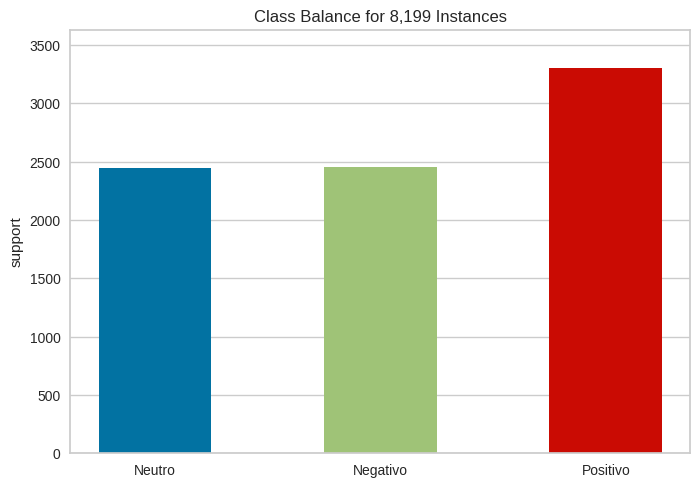

In [37]:
!pip install yellowbrick
# Yellowbrick
# Balanço

from yellowbrick import ClassBalance

# Instanciar
Grafico_Balanco = ClassBalance( labels=['Neutro', 'Negativo', 'Positivo'])
Grafico_Balanco.fit( Base_Dados['Classificacao'])
Grafico_Balanco.show();

In [38]:
# Plot - Avaliar
Anl_Valores = Base_Dados['Classificacao'].value_counts()

# Plotly
Grafico_Balanco_02 = go.Figure(
    go.Funnelarea(
        text=Anl_Valores.index,
        values=Anl_Valores.values,
        title={'text': 'Distribuição dos Sentimentos', 'position': 'top center'}
    )
)

Grafico_Balanco_02.show()

### **Quantidade de Palavras**

In [41]:
# Quantidade de palavras
Exemplo = 'Hoje está chovendo!'

Exemplo.split()
len(Exemplo.split())

3

In [44]:
# Função para calcular o tamanho
def Quantidade_Palavras( Texto ):
  Quebrar = Texto.split()
  Quantidade = len(Quebrar)
  return Quantidade

Base_Dados['Quantidade_Palavras'] = Base_Dados['Text'].apply(Quantidade_Palavras)

# Verificando
Base_Dados.head()

,Created At,Text,Geo Coordinates.latitude,Geo Coordinates.longitude,User Location,Username,User Screen Name,Retweet Count,Classificacao,Data_Formatada,Ano,Mes,Dia,Quantidade_Palavras
0,Sun Jan 08 01:22:05 +0000 2017,���⛪ @ Catedral de Santo Antônio - Governador ...,NaN,NaN,Brasil,Leonardo C Schneider,LeoCSchneider,0,Neutro,2017-01-08,2017,1,8,10
1,Sun Jan 08 01:49:01 +0000 2017,"� @ Governador Valadares, Minas Gerais https:/...",-41.9333,-18.85,NaN,Wândell,klefnews,0,Neutro,2017-01-08,2017,1,8,7
2,Sun Jan 08 01:01:46 +0000 2017,"�� @ Governador Valadares, Minas Gerais https:...",-41.9333,-18.85,NaN,Wândell,klefnews,0,Neutro,2017-01-08,2017,1,8,7
3,Wed Jan 04 21:43:51 +0000 2017,��� https://t.co/BnDsO34qK0,NaN,NaN,NaN,Ana estudando,estudandoconcur,0,Neutro,2017-01-04,2017,1,4,2
4,Mon Jan 09 15:08:21 +0000 2017,��� PSOL vai questionar aumento de vereadores ...,NaN,NaN,NaN,Emily,Milly777,0,Negativo,2017-01-09,2017,1,9,20


In [47]:
# Analise
Base_Dados['Quantidade_Palavras'].describe()

count    8199.000000
mean       16.141115
std         4.280192
min         1.000000
25%        13.000000
50%        15.000000
75%        19.000000
max        32.000000
Name: Quantidade_Palavras, dtype: float64

In [48]:
# Plot
px.box( Base_Dados, x='Classificacao', y='Quantidade_Palavras', color='Classificacao', title='Quantidade de Palavras Sentimento')

### **Nuvem de Palavras**

In [49]:
!pip install wordcloud
# Função para nuvem de palavras
from wordcloud import WordCloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [53]:
# Criando uma wordcloud
# 1º Concatenar o texto em uma unica string

# Variavel
Concatenar = ''

# loop no texto
for Loop in Base_Dados['Text']:


  # Loop para concatenar
  for Palavra in Loop.split():

    # Juntando as palavras
    Concatenar = Concatenar + '' + Palavra

print(f'Quantidade de palavras concatenadas { len(Concatenar )}')


Quantidade de palavras concatenadas 829074


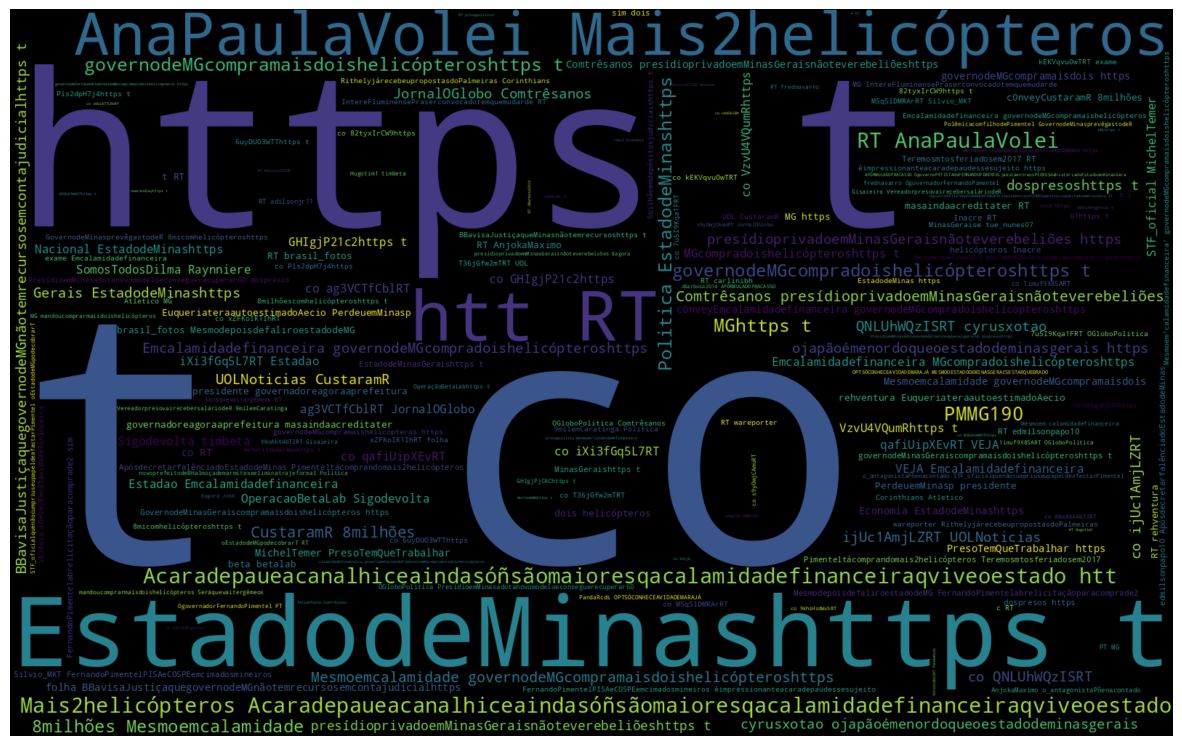

In [57]:
# Plot
# 2º Etapa

# Instanciando a nuvem de palavras
Nuvem_Palavras = WordCloud( width=1600, height=1000 ).generate( Concatenar )

# Tamanho
Figura, Eixo = plt.subplots( figsize=(15, 17))
# Plot
Eixo.imshow( Nuvem_Palavras , interpolation='bilinear' )
# Desativando os grids
Eixo.set_axis_off()

In [58]:
Base_Dados['Classificacao'].unique()

array(['Neutro', 'Negativo', 'Positivo'], dtype=object)

In [67]:
# Ajustando os textos

Palavras_Positivas = ''
Palavras_Negativas = ''
Palavras_Neutras = ''

# Loop
for Sentimento in Base_Dados['Classificacao'].unique():

  # Analise sentimento positivo
  if Sentimento=='Positivo':
    Filtro = Base_Dados.loc[Base_Dados['Classificacao'] == Sentimento ]

    # Loop para concatenar
    for Palavra in Filtro['Text']:
      for Quebra in Palavra.split():
        Palavras_Positivas = Palavras_Positivas + ' ' + Quebra

  # Analise sentimento negativo
  elif Sentimento=='Negativo':
    Filtro = Base_Dados.loc[Base_Dados['Classificacao'] == Sentimento ]

    # Loop para concatenar
    for Palavra in Filtro['Text']:
      for Quebra in Palavra.split():
        Palavras_Negativas = Palavras_Negativas + ' ' + Quebra

    # Analise sentimento neutro
    else:
      Filtro = Base_Dados.loc[Base_Dados['Classificacao'] == Sentimento ]

    # Loop para concatenar
      for Palavra in Filtro['Text']:
        for Quebra in Palavra.split():
          Palavras_Neutras = Palavras_Neutras + ' ' + Quebra

  print(
      'Quantidade de Palavras: \n',
      f'Positivo: {len( Palavras_Positivas )}',
      f'Negativas: {len( Palavras_Negativas )}',
      f'Neutro : {len( Palavras_Neutras )}',
  )

Quantidade de Palavras: 
 Positivo: 0 Negativas: 0 Neutro : 0
Quantidade de Palavras: 
 Positivo: 0 Negativas: 307576 Neutro : 307576
Quantidade de Palavras: 
 Positivo: 374456 Negativas: 307576 Neutro : 307576


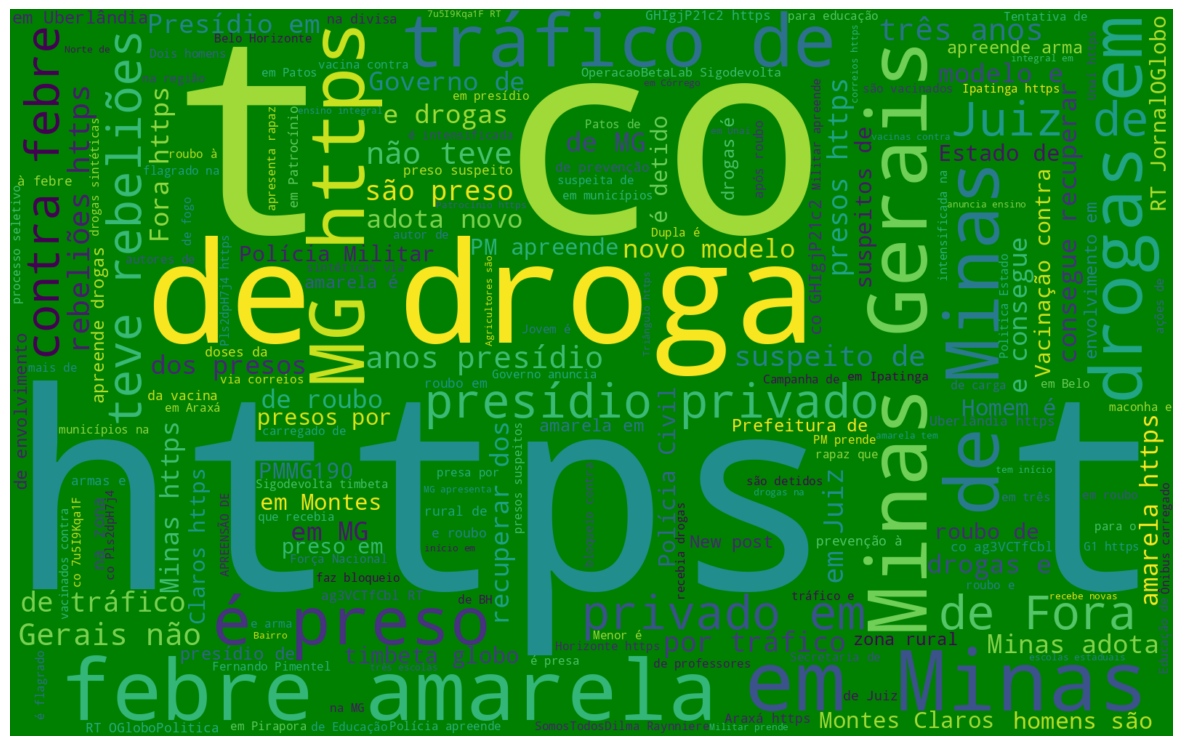

In [68]:
# Nuvem de Palavras Positivas

# Instanciando a nuvem de palavras
Nuvem_Palavras = WordCloud( width=1600, height=1000, background_color='green' ).generate( Palavras_Positivas )

# Tamanho
Figura, Eixo = plt.subplots( figsize=(15, 17))
# Plot
Eixo.imshow( Nuvem_Palavras , interpolation='bilinear' )
# Desativando os grids
Eixo.set_axis_off()

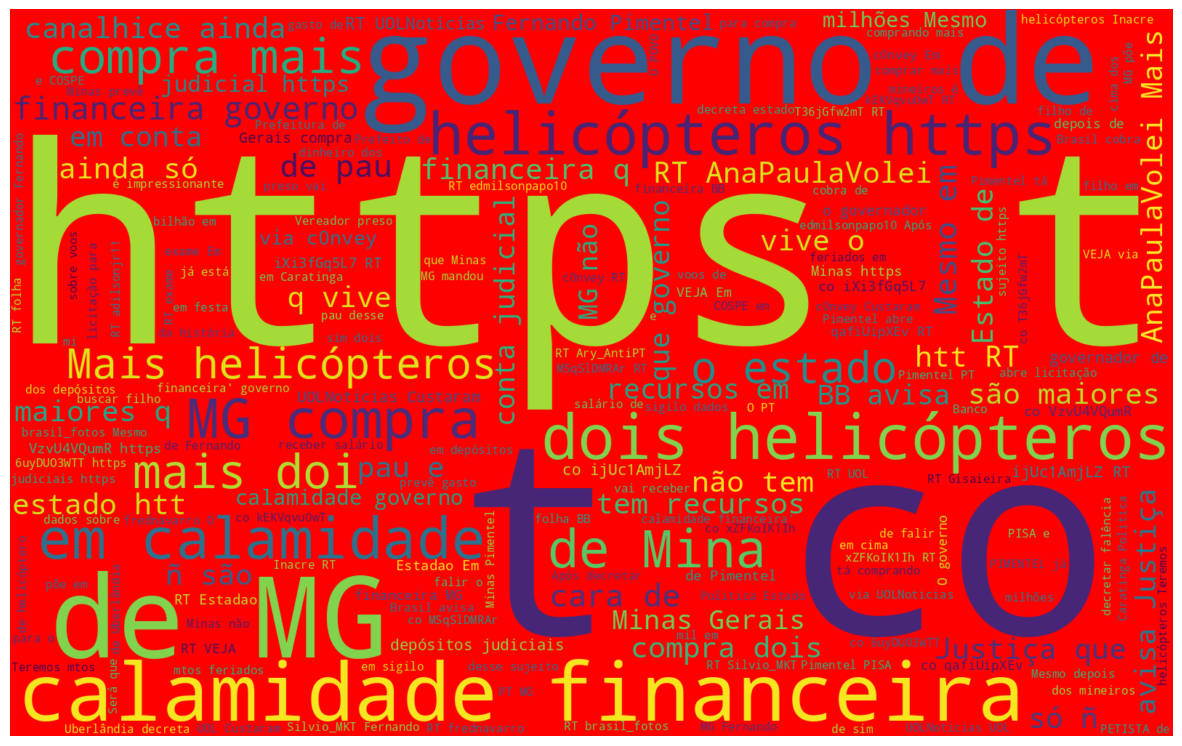

In [70]:
# Nuvem de Palavras Negativas

# Instanciando a nuvem de palavras
Nuvem_Palavras = WordCloud( width=1600, height=1000, background_color='red' ).generate( Palavras_Negativas )

# Tamanho
Figura, Eixo = plt.subplots( figsize=(15, 17))
# Plot
Eixo.imshow( Nuvem_Palavras , interpolation='bilinear' )
# Desativando os grids
Eixo.set_axis_off()

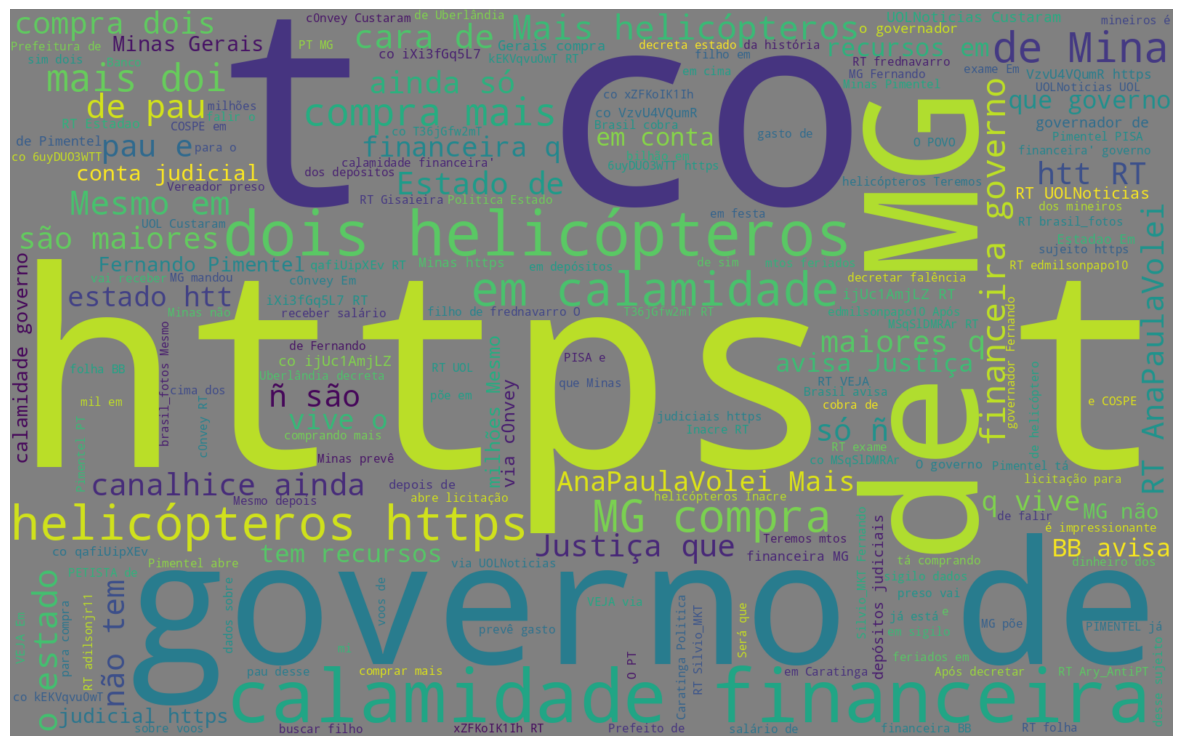

In [72]:
# Nuvem de Palavras Negativas

# Instanciando a nuvem de palavras
Nuvem_Palavras = WordCloud( width=1600, height=1000, background_color='gray' ).generate( Palavras_Neutras )

# Tamanho
Figura, Eixo = plt.subplots( figsize=(15, 17))
# Plot
Eixo.imshow( Nuvem_Palavras , interpolation='bilinear' )
# Desativando os grids
Eixo.set_axis_off()

### **Rank das palavras mais usadas**

In [73]:
# Função 
from collections import Counter

In [85]:
# Quebrar as frases
Quebra_Frases = Base_Dados['Text'].apply( lambda Texto : str(Texto).split() )

# Rank das Palavras
Dados_Rank = Counter( [ item for sublist in Quebra_Frases for item in sublist ] )

# Tabela
Tab_Quantidade = pd.DataFrame( Dados_Rank.most_common(20) )

# Ajustar as colunas
Tab_Quantidade.columns = ['Palavra', 'Qtd']

# Verificar
Tab_Quantidade

,Palavra,Qtd
0,de,8352
1,em,4003
2,RT,3080
3,Minas,2626
4,e,2079
5,-,1937
6,MG,1849
7,a,1707
8,o,1419
9,do,1415


In [86]:
# Plot das Quantidades
Figura = px.bar(
    Tab_Quantidade,
    x='Qtd',
    y='Palavra',
    color='Palavra',
    orientation='h',
    width=700,
    height=700
)

Figura.show()

# **Mineração de Texto**

In [ ]:
print( Base_Dados.shape )
